## Univariate Regression to predict the home prices

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data= {'area':[2600,3000,3200,3600,4000],'price':[550000,565000,610000,680000,725000]}
df = pd.DataFrame(data)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


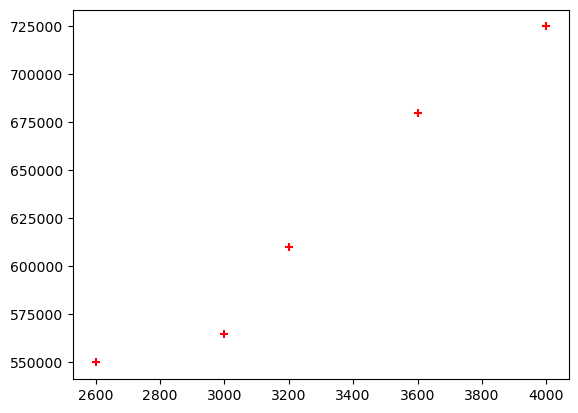

In [4]:
%matplotlib inline
plt.scatter(df.area,df.price,color='red',marker='+')

In [5]:
rg = linear_model.LinearRegression()
rg.fit(df[['area']],df[['price']])

LinearRegression()

In [6]:
print(rg.predict([[3300]])) #x=3300
print(rg.predict([[5000]]))

[[628715.75342466]]
[[859554.79452055]]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [7]:
rg.coef_ #m

array([[135.78767123]])

In [8]:
rg.intercept_ #b

array([180616.43835616])

In [10]:
#y = m*x + b
135.78767123*3300 + 180616.43835616

628715.75341516

In [12]:
d = pd.DataFrame({'area':[1000,2000,3000]})
p = rg.predict(d)
d

,area
0,1000
1,2000
2,3000


In [13]:
d['prices'] = p
d

,area,prices
0,1000,316404.109589
1,2000,452191.780822
2,3000,587979.452055


## Predicting per capita income for the year 2020

In [14]:
db = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv')
db.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [15]:
reg = linear_model.LinearRegression()
reg.fit(db[['year']],db[['per capita income (US$)']])

LinearRegression()

In [16]:
reg.predict([[2020]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41288.69409442]])

## Prediction with multiple Linear Regression

In [17]:
data = {'area': [2600,3000,3200,3600,4000],
    'bedrooms': [3,4,np.nan,3,5],
    'age': [20,15,18,30,8],
    'price': [550000,565000,610000,595000,760000]
}
df = pd.DataFrame(data)

In [18]:
import math
y = math.floor(df['bedrooms'].median())

df['bedrooms']= df['bedrooms'].fillna(y)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      5 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       5 non-null      int64  
 3   price     5 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 288.0 bytes


In [19]:
reg.fit(df[['area','bedrooms','age']],df[['price']])
reg.predict([[4000,4,40]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[555625.]])

In [20]:
reg.predict([[5000,2,40]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[744925.]])

## Predicting Salary with multiple regression

In [21]:
data = {'experience':[np.nan,np.nan,'five','two','seven','three','ten','eleven'],
       'test_score':[8,8,6,10,9,7,np.nan,7],
       'interview_score':[9,6,7,10,6,10,7,8],
       'salary':[50000,45000,60000,65000,70000,62000,72000,80000]}

db = pd.DataFrame(data)

#### Cleaning the data
1. Fill N/A values
2. Convert the strings in numbers in the experience column

In [24]:
!pip install word2number


  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5583 sha256=b4c794376a12c1b07528c7ee09079e225aba2dfe30522ed55c63288cc78ba934
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [25]:
db['test_score'] = db['test_score'].fillna(math.floor(db['test_score'].median()))

from word2number import w2n
db['experience'] = db['experience'].fillna('zero')
db['experience'] = [w2n.word_to_num(data) for data in db['experience']]


#### Building a prediction model

In [26]:
reg = linear_model.LinearRegression()
reg.fit(db[['experience','test_score','interview_score']],db[['salary']])

LinearRegression()

**Predicting Prices for the following data:**

(experience=2 years,teste_score=9,interview_score=6)

(experience=12 years, test_score=10,interview_score=10)

In [27]:
reg.predict([[2,9,6]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[53205.96797671]])

In [28]:
reg.predict([[12,10,10]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[92002.18340611]])